In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("/raid/Praveen_Stuff/Eluvio_DS_Challenge.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB
None
   time_created date_created  up_votes  down_votes  \
0    1201232046   2008-01-25         3           0   
1    1201232075   2008-01-25         2           0   
2    1201232523   2008-01-25         3           0   
3    1201233290   2008-01-25         1           0   
4    1201274720   2008-01-25         4           0   

                                             title  over_18    author 

In [3]:
date_created =  df['date_created'].values.tolist()
date_time1 = {}
for date in date_created:
    k = date.split("-")
    new_k = k[0]
    if date_time1.__contains__(new_k):
        value = date_time1[new_k]
        date_time1[new_k] = value + 1
    else:
        date_time1[new_k] = 1

In [4]:
year_df = pd.DataFrame()
for k,v in date_time1.items():
    year_df = year_df.append({'Date' : k, 'Articles' : v}, ignore_index = True, sort=False)
#year_df.to_csv(r'yearly.csv')

In [5]:
yearly_df = pd.read_csv("yearly.csv")
yearly_df['Date'] = pd.to_datetime(yearly_df['Date'], format='%Y')
# print(yearly_df.head())
# print(yearly_df.info())

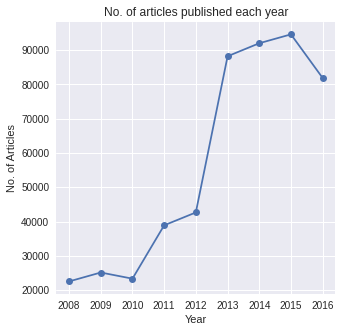

<Figure size 576x396 with 0 Axes>

In [18]:

plt.figure(figsize=(5, 5))
plt.plot_date(yearly_df['Date'], yearly_df['Articles'], linestyle='solid')
plt.xlabel('Year')
plt.ylabel('No. of Articles')
plt.title('No. of articles published each year')

plt.show()
plt.savefig("articles_yearly")

In [8]:
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d')
m1 = df.date_created.dt.month.between(6, 10, inclusive=True) # [June, October]
m2 = df.date_created.dt.month.between(6, 12, inclusive=True) # [June, December]

print(df[m1].author.nunique())
# 14

print(df[m2].author.nunique())

44043
56301


In [9]:
date_time1 = {}
for date in date_created:
    k = date.split("-")
    new_k = k[0] + "-" + k[1]
    if date_time1.__contains__(new_k):
        value = date_time1[new_k]
        date_time1[new_k] = value + 1
    else:
        date_time1[new_k] = 1

In [11]:
month_df = pd.DataFrame()
for k,v in date_time1.items():
    month_df = month_df.append({'Date' : k, 'Articles' : v}, ignore_index = True, sort=False)
#month_df.to_csv(r'monthly.csv')

In [12]:
monthly_df = pd.read_csv("monthly.csv")
# print(month_df.head())
monthly_df['Date'] = pd.to_datetime(monthly_df['Date'], format='%Y-%m')

Text(0.5, 1.0, 'No. of articles published each month')

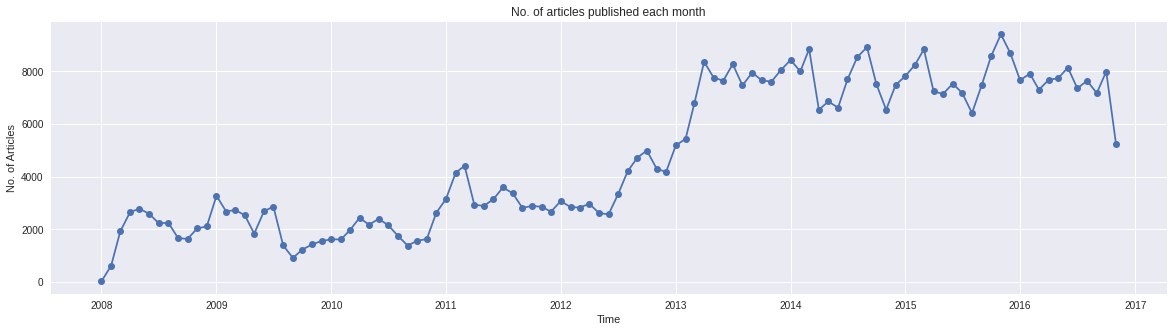

In [13]:
plt.figure(figsize=(20, 5))
plt.plot_date(monthly_df['Date'], monthly_df['Articles'], linestyle='solid')
plt.xlabel('Time')
plt.ylabel('No. of Articles')
plt.title('No. of articles published each month')
plt.savefig("articles_mon")

In [14]:
# print(df.head())

In [16]:
df['date_created'] = pd.to_datetime(df['date_created'], format='%Y-%m-%d')
df['year_month'] = df['date_created'].dt.strftime('%Y-%m')
author_df = df.groupby('year_month').agg({"author": lambda x: x.nunique()}).reset_index()
author_df['year_month'] = pd.to_datetime(author_df['year_month'], format='%Y-%m')
# print(author_df.head())

Text(0.5, 1.0, 'No. of authors published each month')

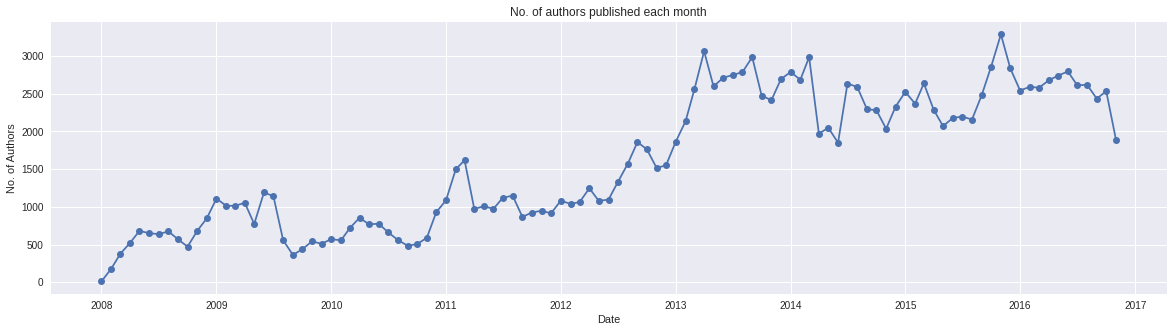

In [17]:
plt.figure(figsize=(20, 5))
plt.plot_date(author_df['year_month'], author_df['author'], linestyle='solid')
plt.xlabel('Date')
plt.ylabel('No. of Authors')
plt.title('No. of authors published each month')